### PyTorch Workflow

In [22]:
import torch
from torch import nn ## tools for building neural networks

In [23]:
import matplotlib.pyplot as plt

In [24]:
torch.__version__

'2.0.0+cu117'

## 1. Data preparing and loading

data can be almost anything... in ml.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation


In [25]:
# Making a straight line with linear regression formula with known paramaters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
len(X), len(y)

(50, 50)

### Splitting data into training and testing set, maybe the most important concept in ml or data science in general(from a data perspective). You can further devide this into training, validation and test set.

usually divided into training is is 60-80(always), validation set is 10-20/(often but not always), and testing set is 10-20(always)

In [27]:
# Create train/test split
train_split = int(0.8 * len(X))
train_split

40

In [28]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to better vizualize data

this is where the data explorers motto comes in!

"Visialize, visualize and visualize"

In [29]:
#Plots training data, test data and compares predictions
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    plt.figure(figsize=(10, 7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    #Plot test data on green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    #are there predictions?
    if predictions is not None:
        #Plot the predictions
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    #Show legend(graph labels)
    plt.legend(prop={'size': 14})

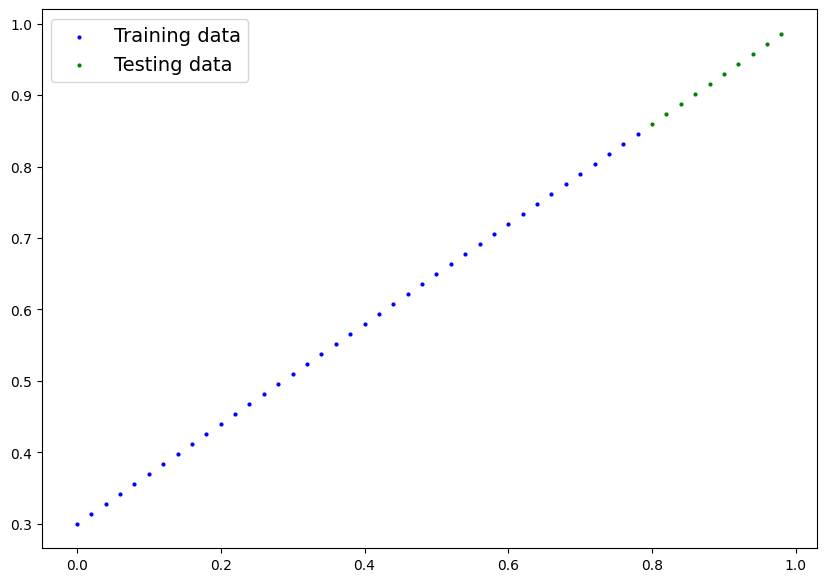

In [30]:
plot_prediction()

### Building model

What our model does:
* Start with random values(weight and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight and bias value we used to create the data)

How does it correct itself to align with the weight and bias:
through 2 main algorithms
1. Gradient descent
2. Backpropagation

In [31]:
# Create linear regression model class, () in class means inherits
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                             requires_grad=True,
                                             dtype=torch.float))
        
    #Forward methof to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias #this is the linear regression formula 

### Pytorch model building essentials

torch.nn contains all the building blocks for computational grpahs(can be considered a neural network)

torch.nn.Parameters - what parameters should out model tru and learn, often a PyTorch layer from torch.nn will set these for us

torch.nn.Modules - The base class for all neural network modules, if you subclass it, you should owerwrite forward()

torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent.

### Checking the contents of our PyTorch model

Now we've created a model, let's se what's inside...

We can check out out mode parameters or what inside using .parameters()

In [32]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking the params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our mode's predictive power, let's sww how well it predicts y_test based on x_test.
When passing data through the model, it will run it through the `forward()` method

In [34]:
X_test, y_test #features and labels

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [35]:
# Make predictions with model
# can also just have y_preds = model_0(X_test), the inference_mode is just to turn of the gradient tracking, potentially faster
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

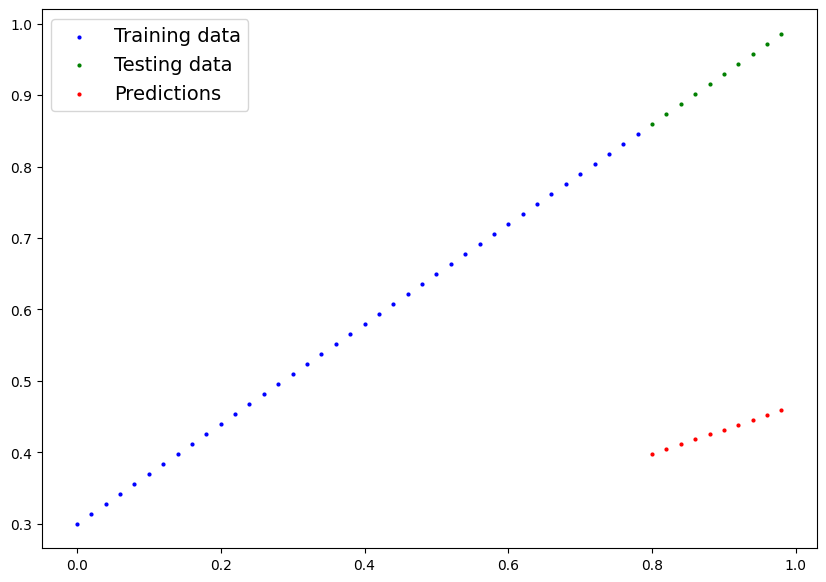

In [36]:
plot_prediction(predictions=y_preds)

### Train model

The whole idea of training is for a model to move from some *unknown* parameters(these may be random) to some *known* parameters
Or in other words from a poor representation of the data to a better representation of the data.

One wat to measure how poor or how wrong your model's predictions are, is to use a loss function.

* Note: loss function may also be called cost function or criterion

Thing we need to train:

**Loss function:** A function to measure how wrong your predcitions are to the real label
**Optimizer:** Takes int account the loss of a model and adjust the model's parameters(eg. weights and biases, in our case ) to imporve the loss function.

And spesifically for PyTorch, we need:
* a training loop
* a testing loop

In [37]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
# Check out our model paramaters, (a parameter is a value that the model set itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001) # lr = learning rate = possibly the most important hyperparameter you can set

In [40]:
loss_fn

L1Loss()

### Building a training loop in PyTorch

A couple of things we need in a training loop:
0. Loop though the data
1. Forward pass (this involves data mobing through our model's `forward()` function) to make prediction on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero ground
4. Loss backward - moves backwards though the neural network to calculate the gradients of each of the parameters of our model with respect to loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [85]:
torch.manual_seed(42)

# An epoch is one loop through the data ---
epochs = 1000

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # Train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # By default how optimizer changes will acculumulate through the loop so we have to 0 them above in step 3 for the next iteration of the loop

    model_0.eval() # turns off gradient tracking

Loss: 0.16195647418498993
Loss: 0.1608043909072876
Loss: 0.15965232253074646
Loss: 0.15850022435188293
Loss: 0.1573481261730194
Loss: 0.15619607269763947
Loss: 0.15504398941993713
Loss: 0.1538918912410736
Loss: 0.15273980796337128
Loss: 0.15158770978450775
Loss: 0.1504356414079666
Loss: 0.14928355813026428
Loss: 0.14813147485256195
Loss: 0.14697939157485962
Loss: 0.1458273082971573
Loss: 0.14467521011829376
Loss: 0.14352312684059143
Loss: 0.1423710286617279
Loss: 0.14121896028518677
Loss: 0.14006686210632324
Loss: 0.1389147937297821
Loss: 0.13776269555091858
Loss: 0.13661061227321625
Loss: 0.1354585438966751
Loss: 0.13430646061897278
Loss: 0.13315437734127045
Loss: 0.13200227916240692
Loss: 0.13085021078586578
Loss: 0.12969812750816345
Loss: 0.12854602932929993
Loss: 0.1273939311504364
Loss: 0.12624187767505646
Loss: 0.12508977949619293
Loss: 0.12393768876791
Loss: 0.12278560549020767
Loss: 0.12163352966308594
Loss: 0.1204814463853836
Loss: 0.11932935565710068
Loss: 0.11817727237939835

In [90]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

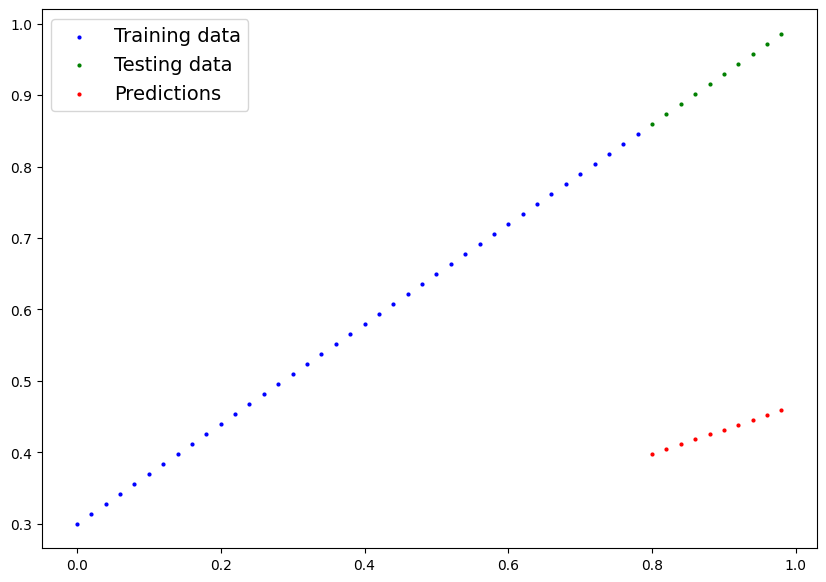

In [91]:
plot_prediction(predictions=y_preds)

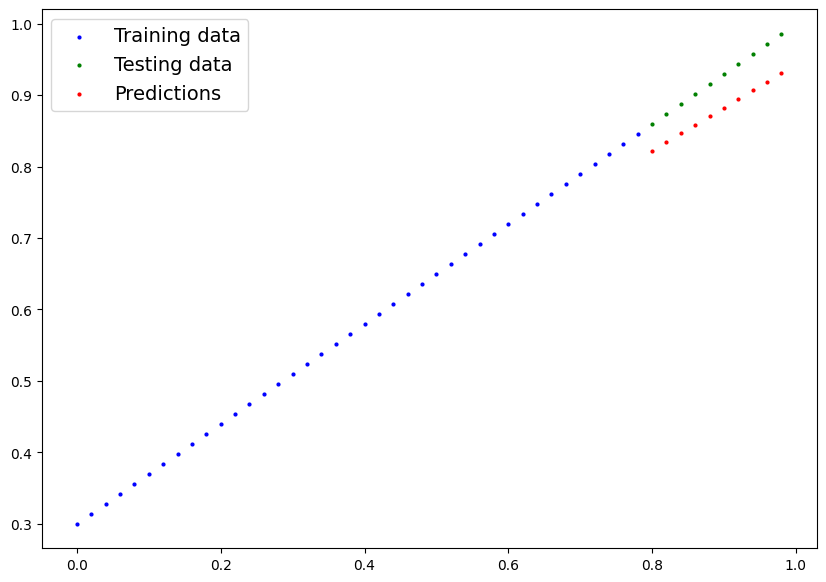

In [92]:
plot_prediction(predictions=y_preds_new)